In [30]:
import pandas as pd

In [31]:
train_df = pd.read_csv('/mnt/Linux/Learning/Python/Kaggle/Predict Calorie Expenditure/train.csv')
train_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


In [32]:
test_df = pd.read_csv('/mnt/Linux/Learning/Python/Kaggle/Predict Calorie Expenditure/test.csv')
test_df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177.0,81.0,7.0,87.0,39.8
1,750001,male,26,200.0,97.0,20.0,101.0,40.5
2,750002,female,29,188.0,85.0,16.0,102.0,40.4
3,750003,female,39,172.0,73.0,20.0,107.0,40.6
4,750004,female,30,173.0,67.0,16.0,94.0,40.5


In [33]:
train_df.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253,88.282781
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875,62.395349
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [34]:
train_df.drop(columns=['id'], inplace=True)

In [35]:
test_df.drop(columns=['id'], inplace=True)

In [36]:
train_df.columns

Index(['Sex', 'Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp',
       'Calories'],
      dtype='object')

In [37]:
train_df.dtypes

Sex            object
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
Calories      float64
dtype: object

In [38]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['Sex'] = le.fit_transform(train_df['Sex'])
test_df['Sex'] = le.transform(test_df['Sex'])

In [39]:
from sklearn.model_selection import train_test_split
X = train_df.drop(columns=['Calories'])
y = train_df['Calories']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

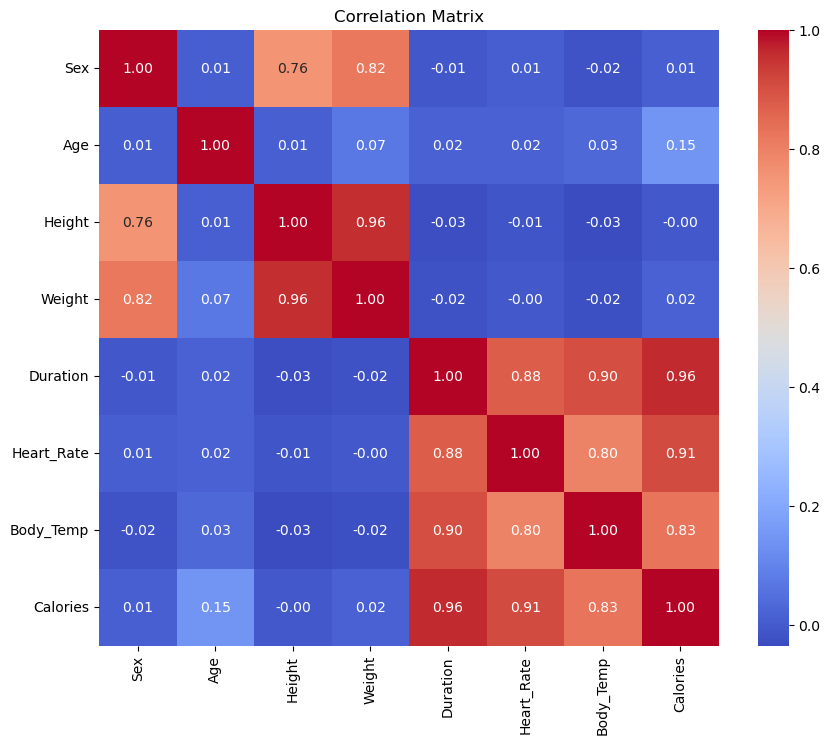

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = train_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [44]:
from sklearn.feature_selection import mutual_info_regression

discrete_features = X.dtypes == int

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::]  # show a few features with their MI scores

Duration      1.641492
Body_Temp     1.122157
Heart_Rate    0.977492
Age           0.098289
Weight        0.055093
Height        0.055028
Sex           0.017111
Name: MI Scores, dtype: float64

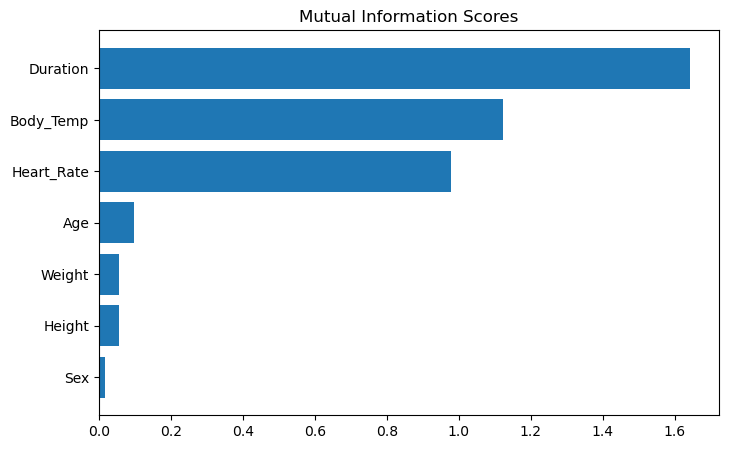

In [45]:
import numpy as np

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)

In [42]:
X.dtypes

Sex             int64
Age             int64
Height        float64
Weight        float64
Duration      float64
Heart_Rate    float64
Body_Temp     float64
dtype: object

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_log_error, r2_score, mean_absolute_error, mean_squared_error

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('RMSLE:', root_mean_squared_log_error(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('R2:', r2_score(y_test, y_pred))

RMSLE: 0.06337713498177744
MAE: 2.3084956987984238
MSE: 14.601221555945072
R2: 0.9962325413781324


In [14]:
#predict on test data test_df
# col_to_scale2 = test_df.drop(columns=['Sex']).columns
# test_df[col_to_scale2] = scaler.fit_transform(test_df[col_to_scale2])
test_pred = rf.predict(test_df)

In [15]:
test_pred

array([ 26.79, 106.61,  87.46, ...,  73.67, 168.66,  79.21])

In [16]:
sample = pd.read_csv('/mnt/Linux/Learning/Python/Kaggle/Predict Calorie Expenditure/sample_submission.csv')

In [17]:
sample['Calories'] = test_pred
sample.head()

,id,Calories
0,750000,26.790
1,750001,106.610
2,750002,87.460
3,750003,127.250
4,750004,76.195


In [18]:
sample.to_csv('/mnt/Linux/Learning/Python/Kaggle/Predict Calorie Expenditure/sample_predict.csv', index=False)